# Proyecto del Día 18 - Analizar una Base de Datos de Perros

Hoy vamos a realizar un proyecto muy entretenido, que consiste en conseguir un dataset sobre razas de perros, que se encuentra alojada en el sitio [The Dog Api](https://thedogapi.com/).

Tu misión consiste en lograr obtener un dataset que contiene información sobre razas de perro ("breeds"), y crear visualizaciones que permitan responder algunas preguntas sobre la **expectativa de vida**, y el **temperamento** más frecuente entre todas las **razas**.


### Preguntas a responder
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?
2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?


### Pasos sugeridos para llegar hasta la respuesta
1. Descarga las **librerías** necesarias.
2. Explora el sitio [https://thedogapi.com/](https://thedogapi.com/) para identificar dónde y cómo se describe el funcionamiento de su API. Identifica la **API específica** con información sobre **razas** ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un **DataFrame** de Pandas.
*Nota: como todo sitio nuevo al que enfrentes, deberás resolver desafíos particulares. En este caso presta atención a las instrucciones que mencionan algo sobre cómo usar los mismos protocolos que se utilizan en la API de gatos de la misma organización*.
3. Realiza un **análisis exploratorio** para conocer la estrucutra y calidad de tus datos.
4. Implementa la **limpieza de datos** que consideres necesaria.
5. Crea los **gráficos** que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.

Te deseo mucho aprendizaje, pero sobre todo, mucha diversión.
¡Adelante!

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
api_key = 'live_Vs4m5GrmjJMSTX6VzddsarEysM0bAWKTj0XsS2Uwess4odjbDq6RVsZTWpz3SelA'

In [3]:
url = 'https://api.thedogapi.com/v1/breeds'

In [4]:
params = {
    'x-api-key': api_key
}

respuesta = requests.get(url, params=params)

data = respuesta.json()

df = pd.DataFrame(data)

df.head()

,weight,height,id,name,breed_group,bred_for,life_span,temperament,origin,reference_image_id,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,Toy,"Small rodent hunting, lapdog",10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Hound,Coursing and hunting,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN
2,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,Terrier,"Badger, otter hunting",10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN
3,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Guardian,Sheep guarding,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN
4,"{'imperial': '65 - 115', 'metric': '29 - 52'}","{'imperial': '24 - 28', 'metric': '61 - 71'}",6,Akita,Working,Hunting bears,10 - 14 years,"Docile, Alert, Responsive, Dignified, Composed...",NaN,BFRYBufpm,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weight              170 non-null    object
 1   height              170 non-null    object
 2   id                  170 non-null    int64 
 3   name                170 non-null    object
 4   breed_group         170 non-null    object
 5   bred_for            149 non-null    object
 6   life_span           170 non-null    object
 7   temperament         166 non-null    object
 8   origin              4 non-null      object
 9   reference_image_id  170 non-null    object
 10  country_code        11 non-null     object
 11  description         1 non-null      object
 12  history             2 non-null      object
dtypes: int64(1), object(12)
memory usage: 17.4+ KB


In [7]:
df.drop(
    ['weight', 'height', 'id', 'bred_for', 'origin', 'reference_image_id', 'country_code', 'description', 'history'],
    axis=1,
    inplace=True
)

In [8]:
df.head()

,name,breed_group,life_span,temperament
0,Affenpinscher,Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ..."
1,Afghan Hound,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy"
2,Airedale Terrier,Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig..."
3,Akbash Dog,Guardian,10 - 12 years,"Loyal, Independent, Intelligent, Brave"
4,Akita,Working,10 - 14 years,"Docile, Alert, Responsive, Dignified, Composed..."


In [50]:
df['life_span'] = df['life_span'].str.replace(' years', '', regex=False).str.replace(' Years', '', regex=False)

split_data = df['life_span'].str.split(r'\s*[-–]\s*', expand=True)

In [51]:
df['life_span_min'] = pd.to_numeric(split_data[0])
df['life_span_max'] = pd.to_numeric(split_data[1])

df['life_span_max'] = df['life_span_max'].fillna(df['life_span_min'])

In [56]:
df['life_span_avg'] = (df['life_span_min'] + df['life_span_max']) / 2

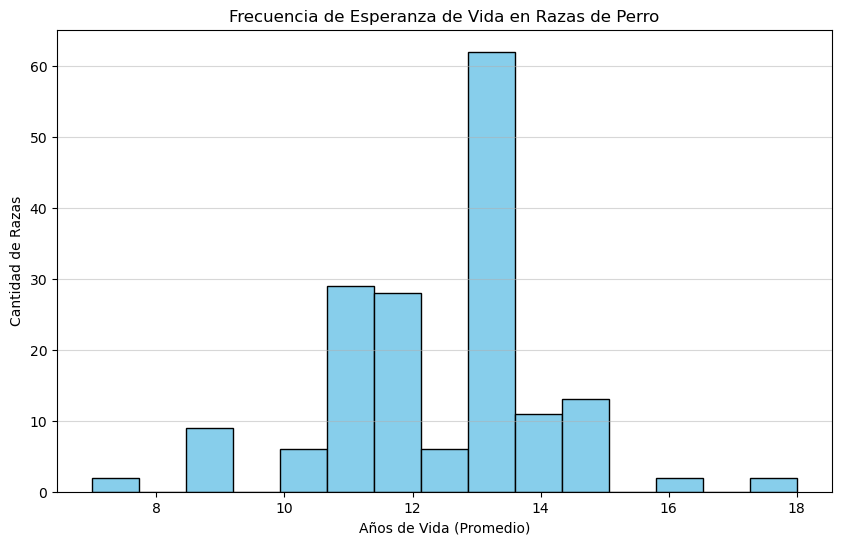

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(df['life_span_avg'], bins=15, color='skyblue', edgecolor='black')

plt.title('Frecuencia de Esperanza de Vida en Razas de Perro')
plt.xlabel('Años de Vida (Promedio)')
plt.ylabel('Cantidad de Razas')
plt.grid(axis='y', alpha=0.5)

In [60]:
temp_series = df['temperament'].dropna()
temp_series

0      Stubborn, Curious, Playful, Adventurous, Activ...
1         Aloof, Clownish, Dignified, Independent, Happy
2      Outgoing, Friendly, Alert, Confident, Intellig...
3                 Loyal, Independent, Intelligent, Brave
4      Docile, Alert, Responsive, Dignified, Composed...
                             ...                        
164    Self-confidence, Aloof, Fearless, Alert, Compa...
165         Fearless, Friendly, Bold, Keen, Alert, Quick
166            Loyal, Gentle, Vigilant, Trainable, Proud
168    Cheerful, Alert, Companionable, Intelligent, P...
169    Bold, Independent, Confident, Intelligent, Cou...
Name: temperament, Length: 166, dtype: object

In [63]:
temp_split = temp_series.str.split(', ')
all_temperaments = temp_split.explode()

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(df['life_span_avg'], bins=15, color='skyblue', edgecolor='black')

plt.title('Frecuencia de Esperanza de Vida en Razas de Perro')
plt.xlabel('Años de Vida (Promedio)')
plt.ylabel('Cantidad de Razas')
plt.grid(axis='y', alpha=0.5)

In [65]:
print(all_temperaments.value_counts().head(10))

temperament
Intelligent     92
Affectionate    54
Alert           51
Loyal           48
Friendly        47
Playful         37
Gentle          33
Energetic       29
Active          25
Fearless        24
Name: count, dtype: int64
